In [10]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-07-16 03:42:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 172.253.114.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   223MB/s    in 0.3s    

2021-07-16 03:42:13 (223 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [13]:
base_dir = '/tmp/cats_and_dogs_filtered' #base directory 

train_dir = os.path.join(base_dir, 'train')   #train directory
validation_dir = os.path.join(base_dir, 'validation') #validation directory
train_cats_dir = os.path.join(train_dir, 'cats') #train cat directory
train_dogs_dir = os.path.join(train_dir, 'dogs') #train dog directorry
validation_cats_dir = os.path.join(validation_dir, 'cats') #validation_cat directory
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #validation dog directory 


In [14]:
# seeing file name of directory
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.887.jpg', 'cat.579.jpg', 'cat.18.jpg', 'cat.845.jpg', 'cat.889.jpg', 'cat.415.jpg', 'cat.82.jpg', 'cat.724.jpg', 'cat.140.jpg', 'cat.271.jpg']
['dog.21.jpg', 'dog.83.jpg', 'dog.369.jpg', 'dog.7.jpg', 'dog.576.jpg', 'dog.132.jpg', 'dog.640.jpg', 'dog.614.jpg', 'dog.211.jpg', 'dog.397.jpg']


In [15]:
#seeing total ammout of directory
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [16]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

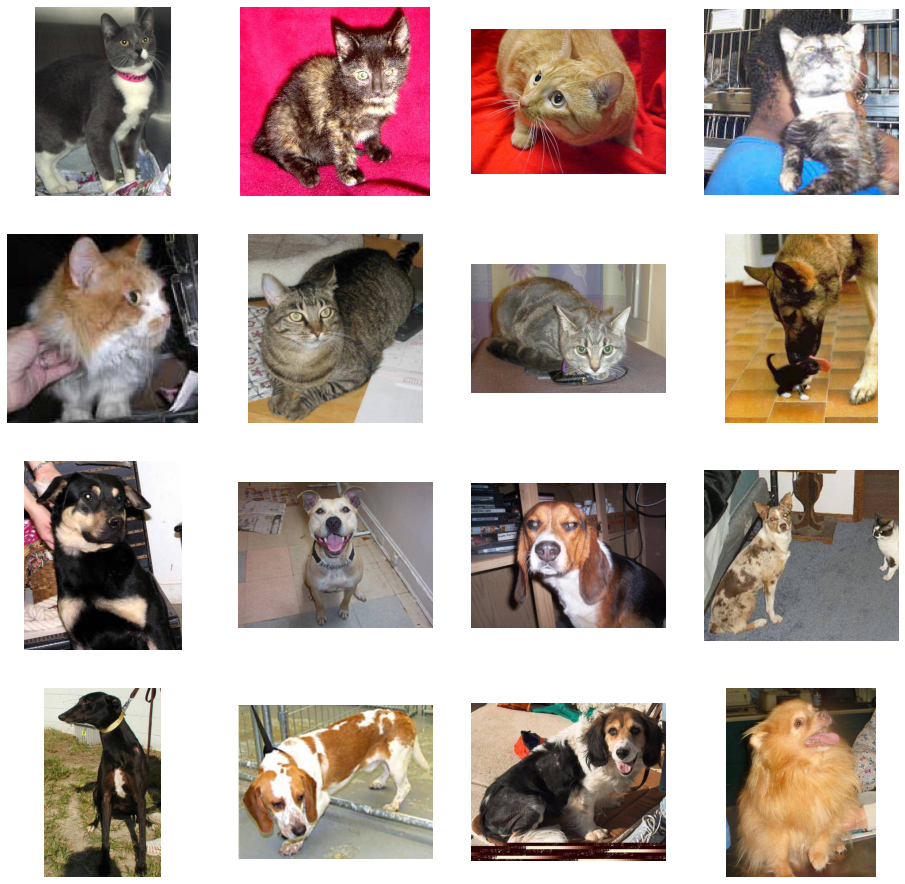

In [17]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [18]:
#importing tensorflow
import tensorflow as tf

<h1>Here we are going to define Sequential layer </h1>
<p>Here all the images are in 150x150 and all are colurful so that dimesion of them are as 150x150x3 </p>
<p>We then add a couple of convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers.</p>
<p>Here we have binary classifaction (dog and cat ) so activation of last neuron is sigmoid</p>

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),  #Flatten the result and fit them into Dense Neural network
                                    tf.keras.layers.Dense(512, activation='relu'), #Dense layer with 512 hidden units
                                    #only one output unti due to binary classifaction,
                                    tf.keras.layers.Dense(1, activation='sigmoid')  

                                    ])

In [20]:
model.summary() #seeing details of model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


<h1><font color="red">Data Preprocessing </font></h1>
Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#All inmages are rescaling between 0-1
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
#here we dividing the data in 20 batches means 100 examples for each batch in training dataset and 50 examples for each batch in validation data set
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary', 
                                                    target_size=(150, 150)) 
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<h1><b>Training of model </h1>

In [24]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 61s - loss: 0.7700 - accuracy: 0.5485 - val_loss: 0.6575 - val_accuracy: 0.6640
Epoch 2/15
100/100 - 61s - loss: 0.6566 - accuracy: 0.6675 - val_loss: 0.6159 - val_accuracy: 0.6770
Epoch 3/15
100/100 - 60s - loss: 0.5580 - accuracy: 0.7375 - val_loss: 0.5451 - val_accuracy: 0.7300
Epoch 4/15
100/100 - 59s - loss: 0.4998 - accuracy: 0.7790 - val_loss: 0.5702 - val_accuracy: 0.7180
Epoch 5/15
100/100 - 60s - loss: 0.3996 - accuracy: 0.8205 - val_loss: 0.6159 - val_accuracy: 0.7300
Epoch 6/15
100/100 - 60s - loss: 0.3203 - accuracy: 0.8605 - val_loss: 0.6558 - val_accuracy: 0.7280
Epoch 7/15
100/100 - 60s - loss: 0.2250 - accuracy: 0.9005 - val_loss: 0.7040 - val_accuracy: 0.7230
Epoch 8/15
100/100 - 60s - loss: 0.1567 - accuracy: 0.9365 - val_loss: 1.0092 - val_accuracy: 0.7310
Epoch 9/15
100/100 - 59s - loss: 0.1385 - accuracy: 0.9520 - val_loss: 1.0156 - val_accuracy: 0.7340
Epoch 10/15
100/100 - 59s - loss: 0.0953 - accuracy: 0.9735 - val_loss: 1.1725 - val_accura

In [26]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving 1.jpg to 1 (1).jpg
Saving 2.jpg to 2 (1).jpg
Saving 3.jpg to 3 (1).jpg
Saving 4.jpg to 4 (1).jpg
Saving 5.jpg to 5 (1).jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
[1.]
1.jpg is a dog
[1.]
2.jpg is a dog
[1.5468916e-10]
3.jpg is a dog
[1.]
4.jpg is a dog
[0.]
5.jpg is a cat
[1.]
6.jpg is a dog
[0.]
7.jpg is a cat
[1.]
8.jpg is a dog
[0.]
9.jpg is a cat
[1.]
10.jpg is a dog


<h3>Visualizing Intermediate Representations</h3>
<p>
To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.</p>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


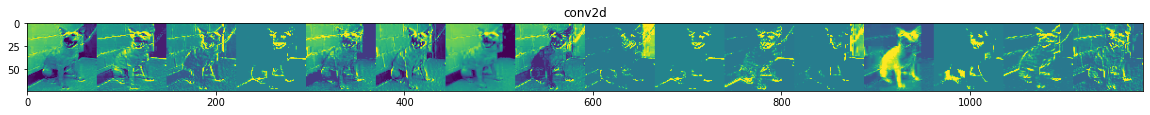

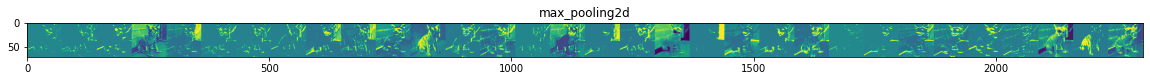

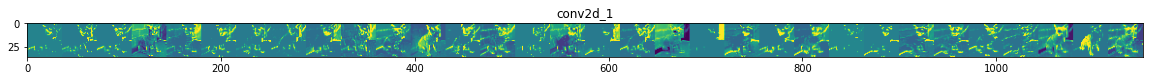

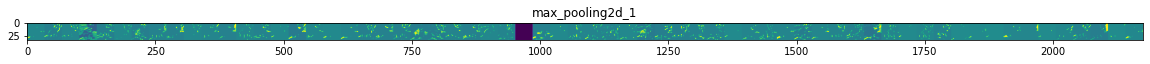

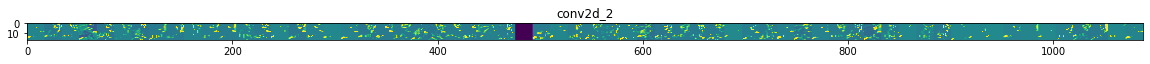

In [27]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

<h1><b>Model evlauation</b></h1>

Text(0.5, 1.0, 'Training and validation loss')

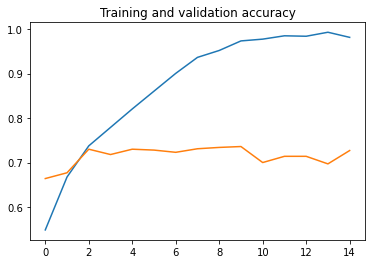

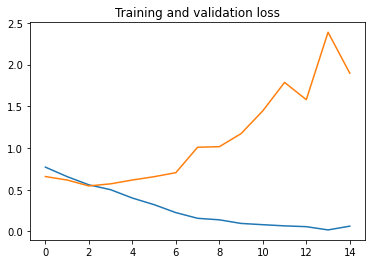

In [28]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )